In [8]:
# Criando o array de imagens

import os
files_path = [os.path.abspath(x) for x in os.listdir('./') if x.endswith('.jpg')]
print(files_path)



['/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio41.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio33.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio28.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio42.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio49.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio46.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio44.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio24.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio45.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio23.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoF

radio1.jpg


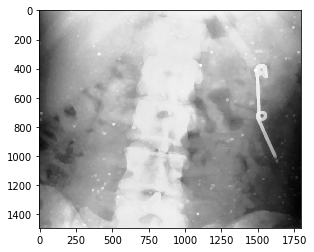

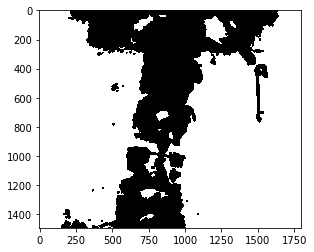

radio2.jpg


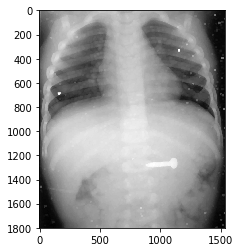

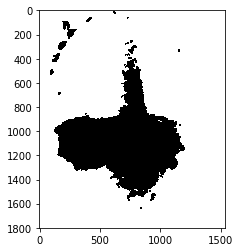

radio3.jpg


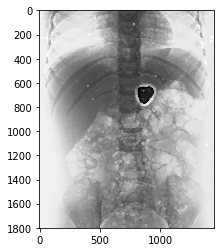

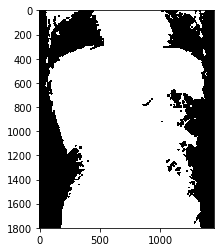

radio4.jpg


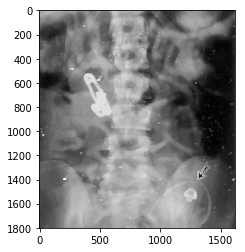

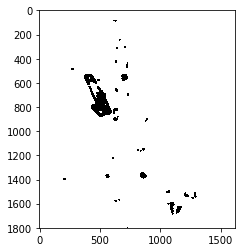

radio5.jpg


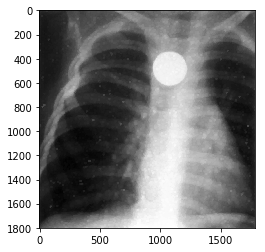

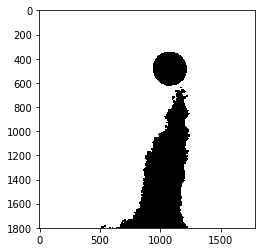

radio6.jpg


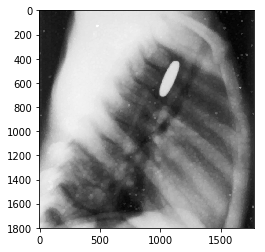

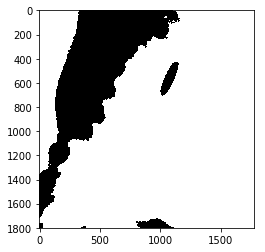

radio7.jpg


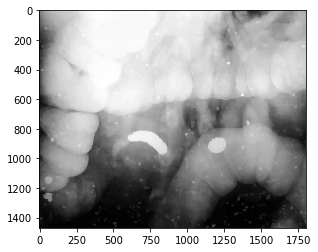

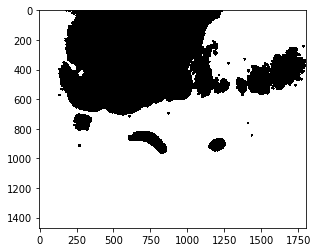

radio8.jpg


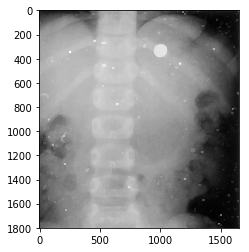

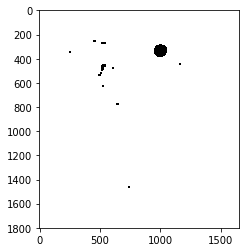

radio9.jpg


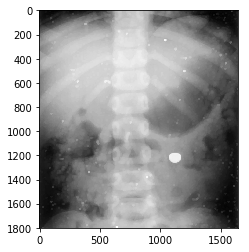

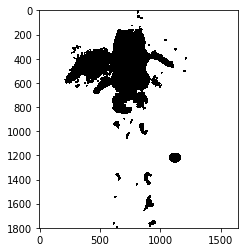

radio10.jpg


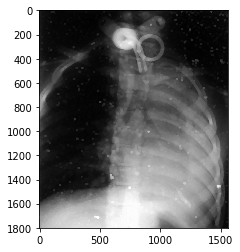

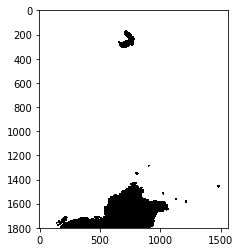

radio11.jpg


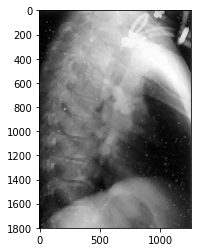

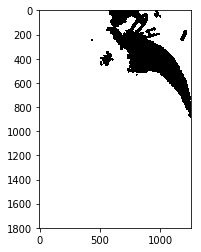

radio12.jpg


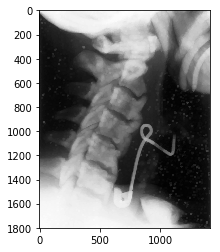

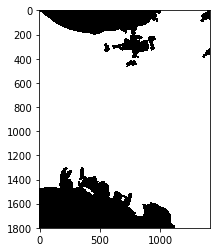

radio13.jpg


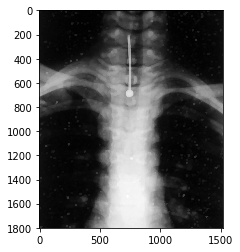

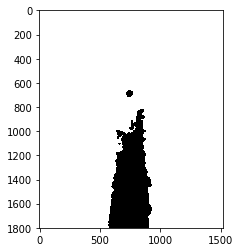

radio14.jpg


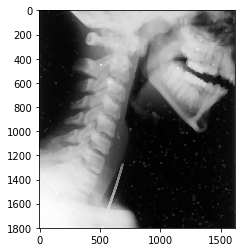

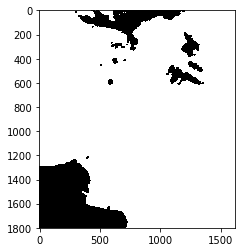

radio15.jpg


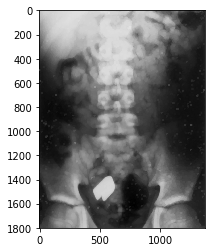

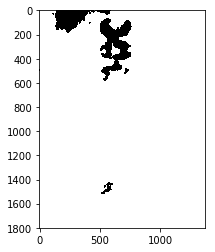

radio16.jpg


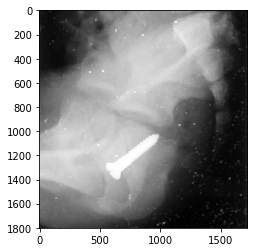

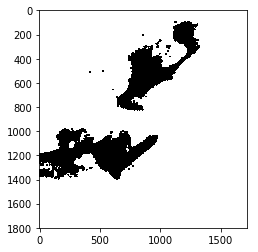

radio17.jpg


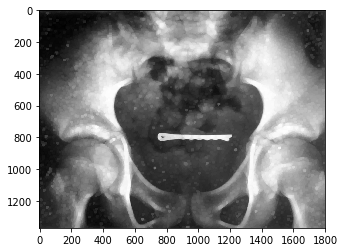

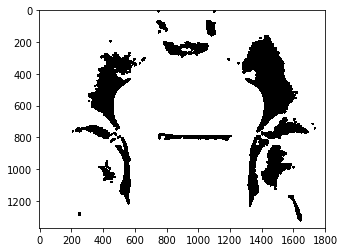

radio18.jpg


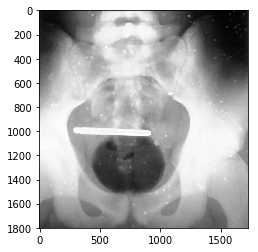

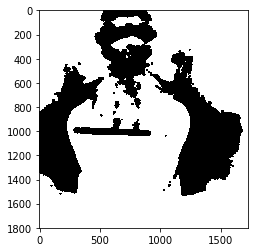

radio19.jpg


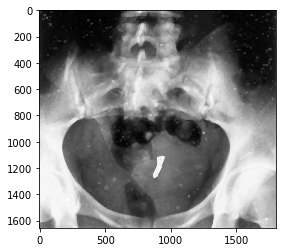

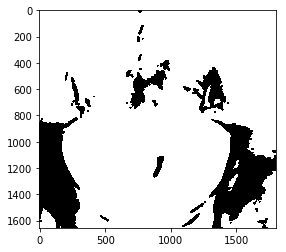

radio20.jpg


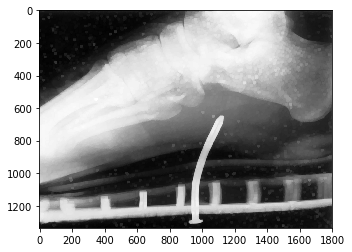

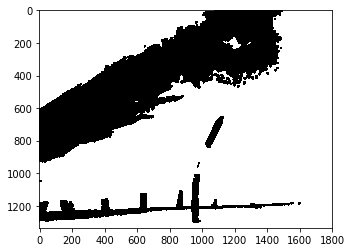

radio21.jpg


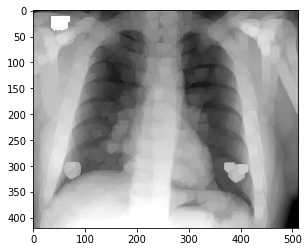

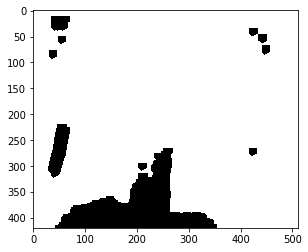

radio22.jpg


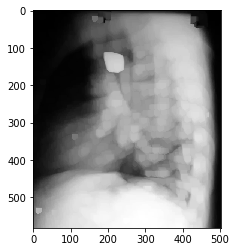

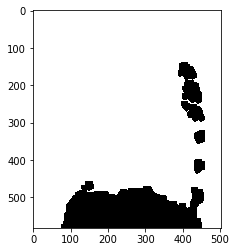

radio23.jpg


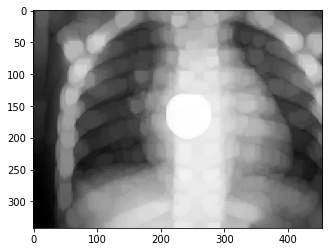

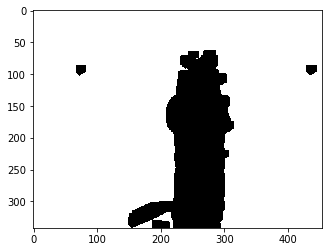

radio24.jpg


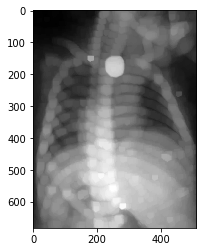

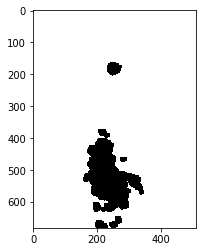

radio25.jpg


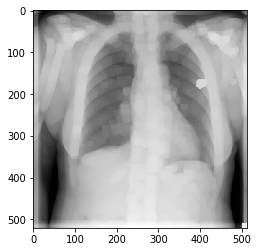

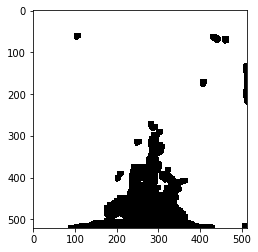

radio26.jpg


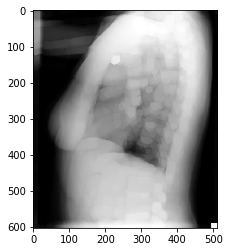

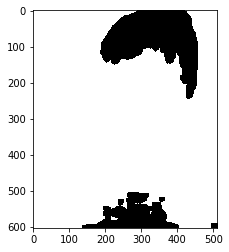

radio27.jpg


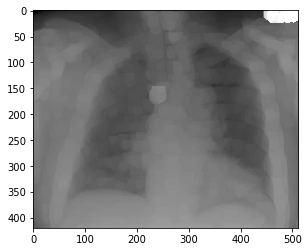

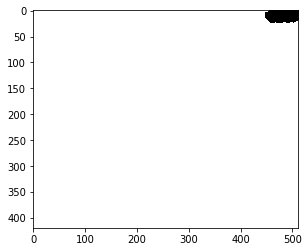

radio28.jpg


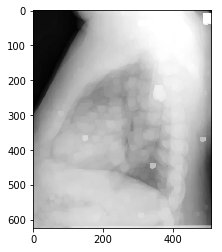

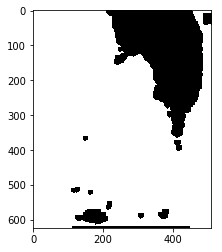

radio29.jpg


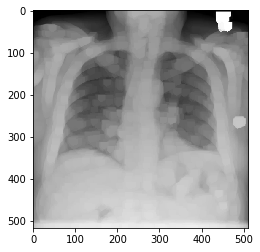

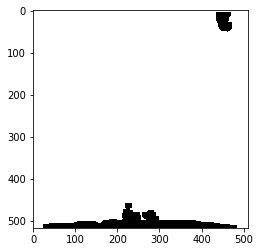

radio30.jpg


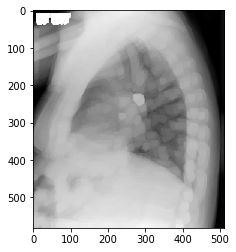

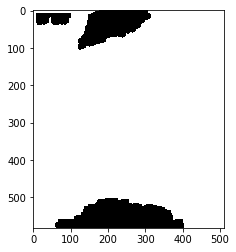

radio31.jpg


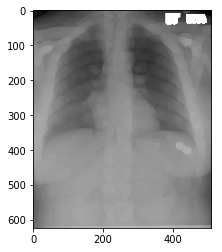

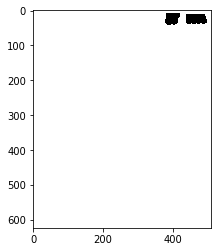

radio32.jpg


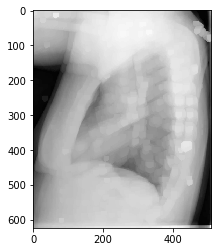

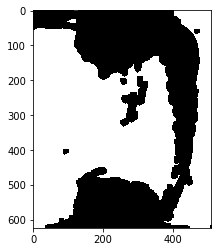

radio33.jpg


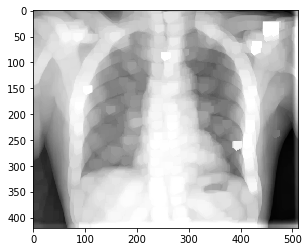

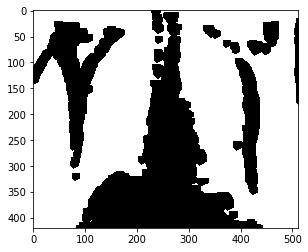

radio34.jpg


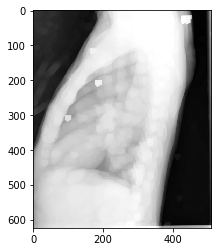

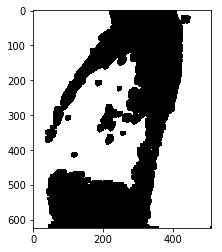

radio35.jpg


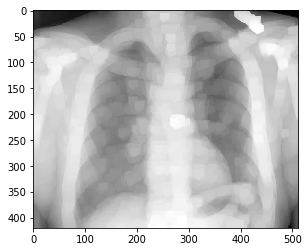

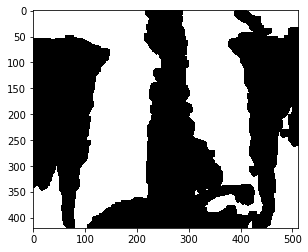

radio36.jpg


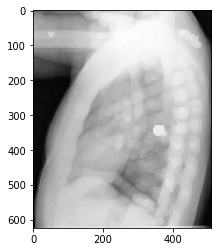

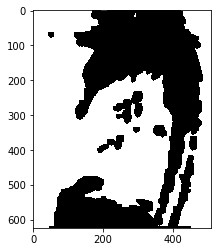

radio37.jpg


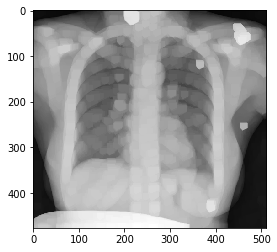

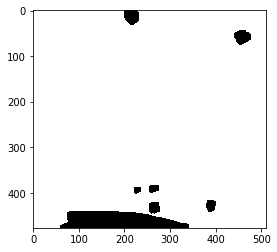

radio38.jpg


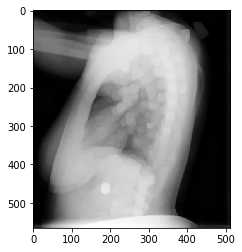

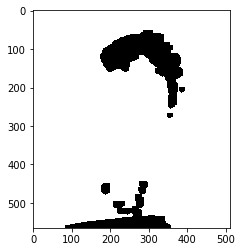

radio39.jpg


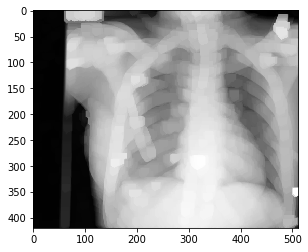

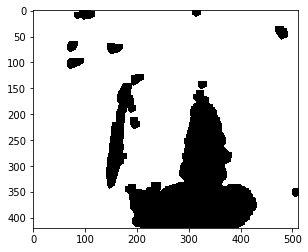

radio40.jpg


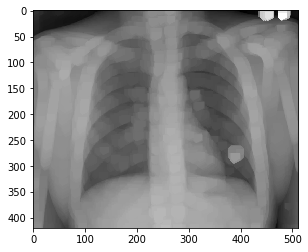

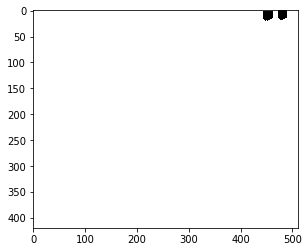

radio41.jpg


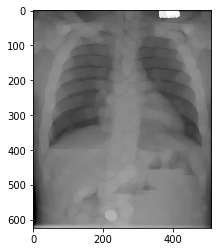

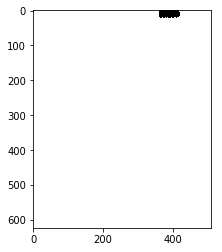

radio42.jpg


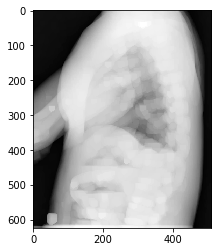

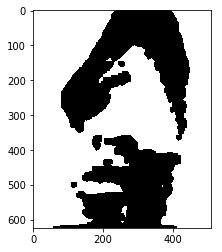

radio43.jpg


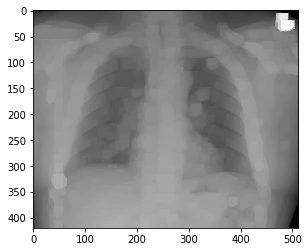

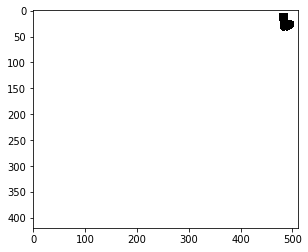

radio44.jpg


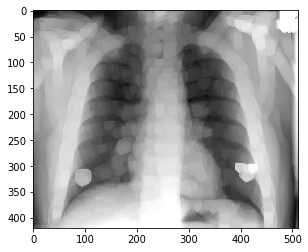

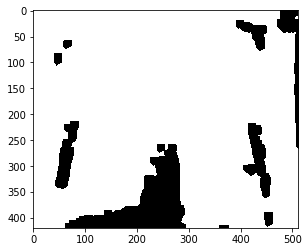

radio45.jpg


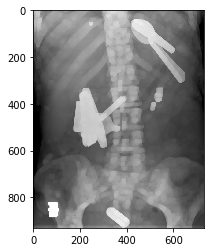

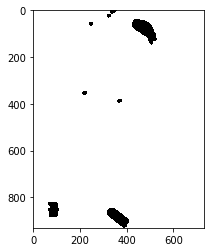

radio46.jpg


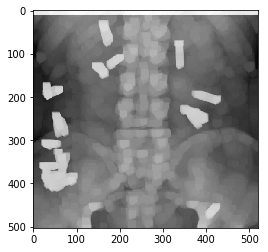

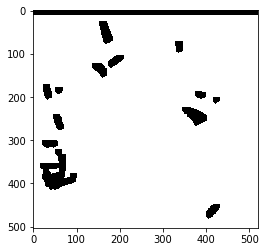

radio47.jpg


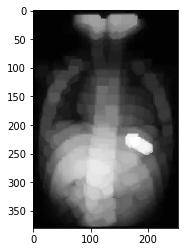

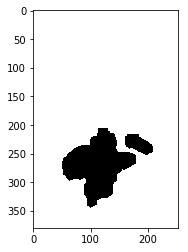

radio48.jpg


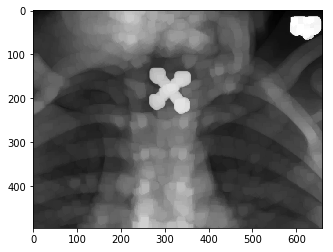

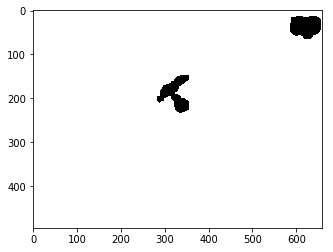

radio49.jpg


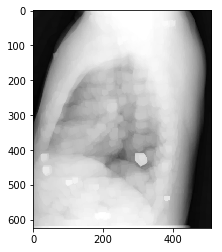

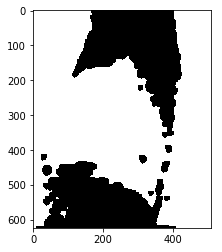

radio50.jpg


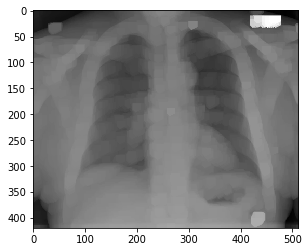

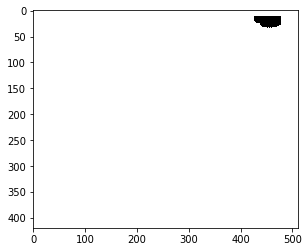

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


for i in range(50):

    
#======================SÓ=COM=DILATACAO=E=INTERVALO====================================

    ## NOME DA IMAGEM
    print('radio'+str(i+1)+'.jpg')
    
    ## Convertendo a imagem para escala de cinza

    imgTeste = cv2.imread('radio'+str(i+1)+'.jpg')
    imgTeste = cv2.cvtColor(imgTeste, cv2.COLOR_RGB2GRAY)
    
    imgNormal = imgTeste
    


    # DILATAR OS PIXELS DA IMAGEM VISANDO DESTACAR OS CORPOS ESTRANHOS MENORES

    ## elementoEstruturante
    elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
    imgTeste = cv2.dilate(imgTeste, elementoEstruturante, iterations = 5)



    plt.gray()
    plt.imshow(imgTeste)
    plt.show()


    
    # DETECTAR BORDAS
    
    
    

    ## Coletar o maior valor dos pixels da imagem (considerando corpo estranho denso)

    quantidadeLinhas, quantidadeColunas = imgTeste.shape

    maiorValorPixel = max([valor for quantidadeLinhas in imgTeste for valor in quantidadeLinhas])
    #print(maior)


    # SELECIONANDO PIXEL'S DE UM INTERVALO
    _, img2 = cv2.threshold(imgTeste, maiorValorPixel-40, maiorValorPixel, cv2.THRESH_BINARY_INV)

    
#====================================================================================================


#===========================COM=BORDAS================================================================
    
    # PROCURANDO BORDAS
    
    
    
    imgBorda = imgTeste - imgNormal
    
    imgProcessada = imgBorda - img2
    
    
    
    ## APLICANDO NOVAMENTE A DILATAÇÃO
    
    elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
    imgProcessada = cv2.dilate(imgProcessada, elementoEstruturante, iterations = 1)
    
    
    

    # SELECIONANDO MAIS UMA VEZ PIXEL'S DE UM INTERVALO
    maiorValorPixel = max([valor for quantidadeLinhas in imgProcessada for valor in quantidadeLinhas])
    _, imgProcessada = cv2.threshold(imgProcessada, maiorValorPixel-100, maiorValorPixel, cv2.THRESH_BINARY_INV)
    
    
#===============================================================================================================



#==================================APRESENTANDO=RESULTADOS======================================================
   
    plt.imshow(img2)
    plt.show()


In [ ]:
# FAZER UMA FUNÇÃO QUE ESCUREÇA GRANDES ÁREAS -- talvez com análise de um grupo de vizinhos?
# FAZER UMA FUNÇÃO QUE EVIDENCIE O CORPO ESTRANHO -- a mesma análise de visinhos
# outro esquema seria notar a mudança abrupta de nível de cinza!